Alunos:
  - Fabiane Sorbar
  - Vinicius Tessele   

 - Finalize o Colab original para testar todas as instâncias da base de teste. Avalie o desempenho geral e discuta.
 - Apresente as imagens que foram erroneamente classificadas. Discuta. Apresente as métricasprecision,recall e f1-score por classe.
 - Aumente os hiperparâmetros número de épocas e neurônios por camada para tentar melhorarodesempenho. Discuta. Apresente uma tabela e um gráfico dos resultados.
 - Substituta o otimizador original (sgd) por outros também populares (Adam, RMSprop e Nadam). Compare aperformance em termos da acurácia final e da convergência (gráfico de loss).  


**1 - Importando as bibliotécas e definindo a classe de nomes**

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def relu(z): return np.maximum(0, z)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [19]:
fashion_mnist = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [15]:
def criarModelo(neuroniosPrimeiraCamadaOculta, neuroniosSegundaCamadaOculta):
  global model
  model = keras.models.Sequential([
      keras.layers.Input(shape=(32, 32,3)),
      keras.layers.Flatten(),
      keras.layers.Dense(neuroniosPrimeiraCamadaOculta, activation="relu"),
      keras.layers.Dense(neuroniosSegundaCamadaOculta, activation="relu"),
      keras.layers.Dense(10, activation="softmax")
  ])
  return model

def criarModeloDropout(neuroniosPrimeiraCamadaOculta, neuroniosSegundaCamadaOculta):
  global model
  model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(neuroniosPrimeiraCamadaOculta, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(neuroniosSegundaCamadaOculta, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])
  return model

def criarModeloIdealImagem(neuroniosPrimeiraCamadaOculta, neuroniosSegundaCamadaOculta):
  global model
  model = keras.models.Sequential([
      keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Conv2D(64, (3, 3), activation='relu'),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Flatten(),
      keras.layers.Dense(neuroniosPrimeiraCamadaOculta, activation='relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(neuroniosSegundaCamadaOculta, activation='softmax')
  ])
  return model

def compilarModelo(otimizador):
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer= otimizador,
                metrics=["accuracy"])
  return model

def treinar(numEpocas):
  history = model.fit(X_train, y_train, epochs=numEpocas,
                      validation_data=(X_valid, y_valid))
  return history

def plotarMatrizDeConfusao(nome, X_novos, y_novos, class_names):
  print(f'Gerando matriz de confusão {nome}...\n')

  y_proba = model.predict(X_novos)
  y_pred = np.argmax(y_proba, axis=1)

  matriz_confusao = confusion_matrix(y_novos, y_pred)

  plt.figure(figsize=(10, 8))
  sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Classe Predita')
  plt.ylabel('Classe Verdadeira')
  plt.title(f'Matriz de Confusão - {nome}')
  plt.tight_layout()
  plt.show()
  return

def plotarCurvaDeAcuracia(history):
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.show()
  return

def avaliarConjuntoTestesDesconhecido():
  test_loss, test_accuracy = model.evaluate(X_test / 255.0, y_test)
  print(f'Resultado da avaliação:')
  print(f'- Acurácia: {test_accuracy:.4f}')
  print(f'- Erro (loss): {test_loss:.4f}\n')
  return

**2 - Processamento e treinamento com 30 épocas modelo sgd (Stochastic Gradient Descent)**

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.2771 - loss: 2.0004 - val_accuracy: 0.3502 - val_loss: 1.7742
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3852 - loss: 1.7345 - val_accuracy: 0.3796 - val_loss: 1.7123
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4227 - loss: 1.6345 - val_accuracy: 0.4186 - val_loss: 1.6320
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.4386 - loss: 1.5810 - val_accuracy: 0.4012 - val_loss: 1.6543
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4591 - loss: 1.5398 - val_accuracy: 0.4022 - val_loss: 1.6606
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4760 - loss: 1.4828 - val_accuracy: 0.4272 - val_loss: 1.6514
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.4869 - loss: 1.4602 - val_accuracy: 0.4508 - val_loss: 1.5346
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4943 - loss:

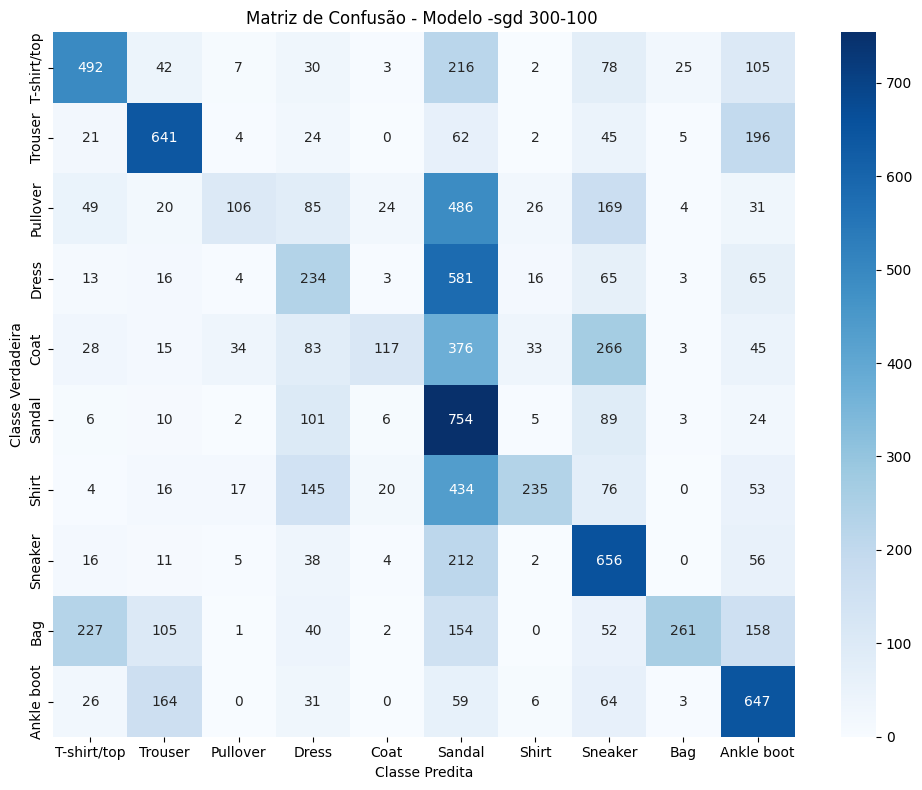

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4133 - loss: 1.8802
Resultado da avaliação:
- Acurácia: 0.4143
- Erro (loss): 1.8720



In [20]:
criarModelo(300, 100) #300 primeira camada oculta e 100 na segunda camada oculta
compilarModelo("sgd") #otimizador
history = treinar(30) #30 épocas
X_novos = X_test
y_novos = y_test
plotarMatrizDeConfusao('Modelo -sgd 300-100 ',X_test / 255.0, y_test, class_names)
avaliarConjuntoTestesDesconhecido()

**3 - Ajuste dos hiperparâmetros: número de épocas e neurônios por camada.**

Epoch 1/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.2778 - loss: 1.9883 - val_accuracy: 0.3516 - val_loss: 1.7721
Epoch 2/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.3919 - loss: 1.7206 - val_accuracy: 0.3768 - val_loss: 1.7088
Epoch 3/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.4250 - loss: 1.6258 - val_accuracy: 0.3764 - val_loss: 1.7575
Epoch 4/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.4465 - loss: 1.5632 - val_accuracy: 0.3796 - val_loss: 1.7752
Epoch 5/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4648 - loss: 1.5153 - val_accuracy: 0.4348 - val_loss: 1.5609
Epoch 6/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.4772 - loss: 1.4750 - val_accuracy: 0.4566 - val_loss: 1.5292
Epoch 7/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.4871 - loss: 1.4427 - val_accuracy: 0.3966 - val_loss: 1.7394
Epoch 8/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.4986 -

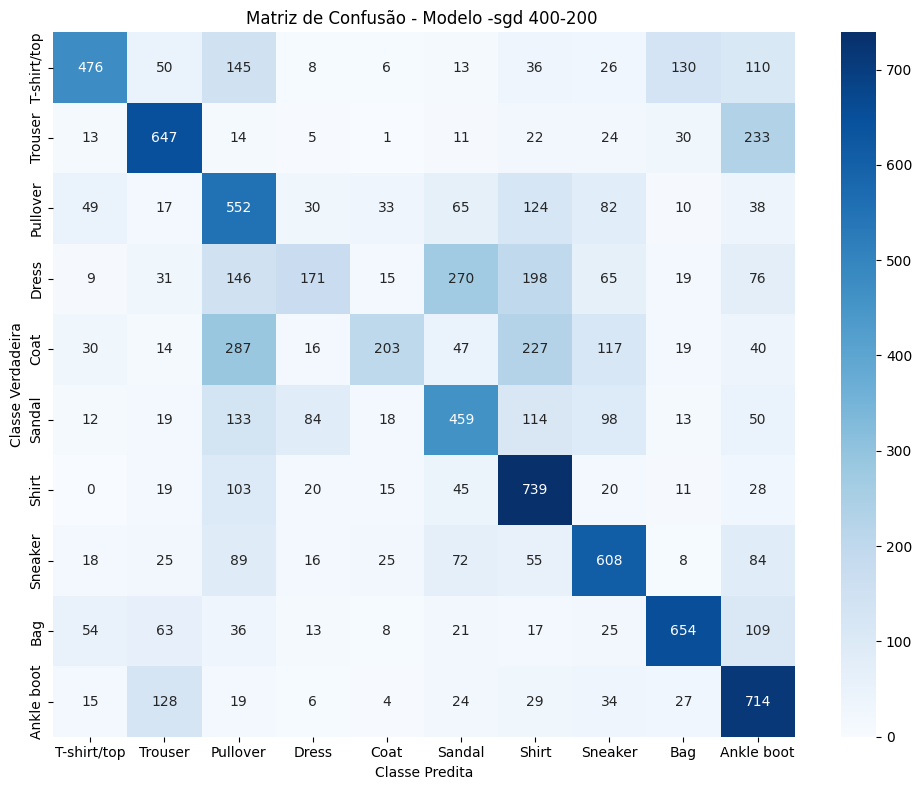

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5218 - loss: 1.4745
Resultado da avaliação:
- Acurácia: 0.5223
- Erro (loss): 1.4613



In [21]:
criarModelo(400, 200) #400 neuronios na primeira camada oculta e 200 na segunda oculta
compilarModelo("sgd") #otimizador
history = treinar(40) #40 épocas
X_novos = X_test
y_novos = y_test
plotarMatrizDeConfusao('Modelo -sgd 400-200 ',X_test / 255.0, y_test, class_names)
avaliarConjuntoTestesDesconhecido()

**A análise do sgd com 30 épocas 300-100 camadas x 40 épocas 400-200: o primeiro modelo se mostrou mais eficiente classificando melhor as imagens que são semelhentes.**

Montando arquitetura do modelo...

- Camada oculta 1: 300 neurônios
- Camada oculta 2: 100 neurônios


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None
Modelo criado e pronto para compilação.

Configurando modelo para o treinamento...

- Otimizador selecionado: adam
Iniciando treinamento por 30 épocas...
Aguarde o processo concluir.

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7814 - loss: 0.6145 - val_accuracy: 0.8680 - val_loss: 0.3682
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8633 - loss: 0.3730 - val_accuracy: 0.8674 - val_loss: 0.3481
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8782 - loss: 0.3285 - val_accuracy: 0.8912 - val_loss: 0.3082
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8893 - loss: 0.2993 - val_accuracy: 0.8908 - val_loss: 0.3062
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8947 - loss: 0.2815 - val_accuracy: 0.8906 - val_loss: 0.3040
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8979 - loss: 0.2706 - val_accuracy: 0.8842 - val_loss: 0.3307
Epoch 7/30
1719/1719 ━━━━

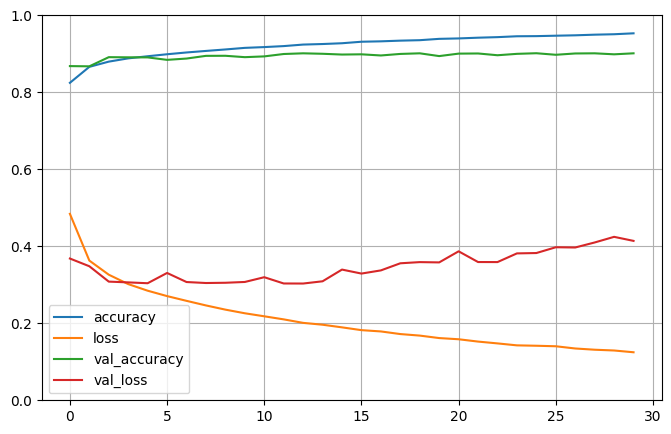

Executando avaliação final no conjunto de testes...

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8897 - loss: 0.4619
Resultado da avaliação:
- Acurácia: 0.8916
- Erro (loss): 0.4561

Gerando matriz de confusão Modelo_adam 30 épocas 300 primeira camada e 100 segunda camada...

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


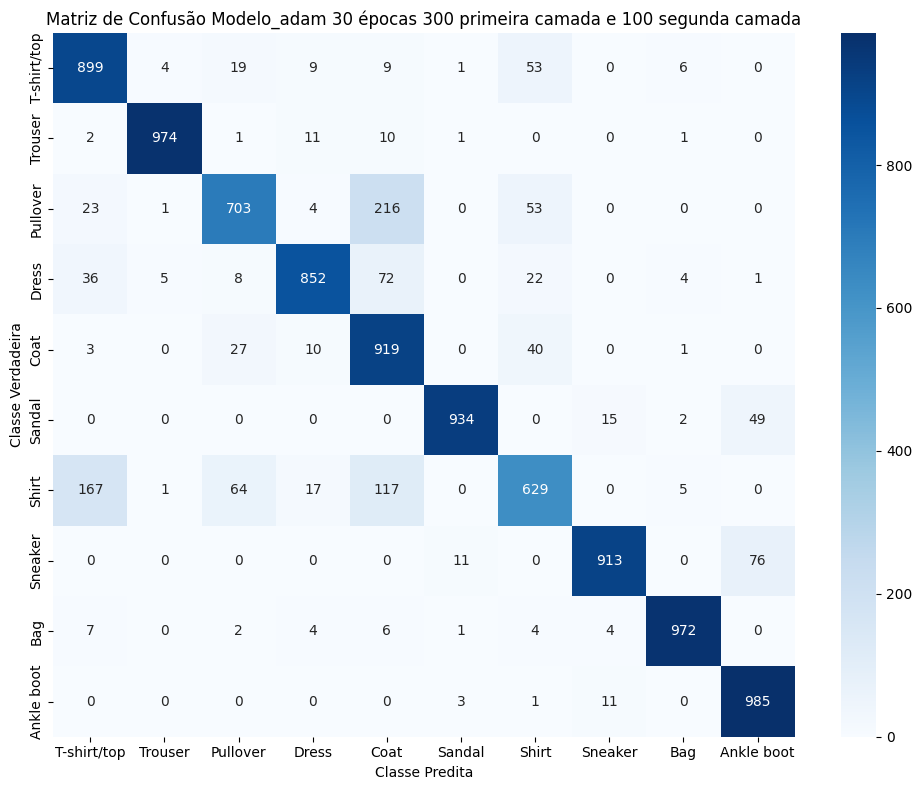

Configurando modelo para o treinamento...

- Otimizador selecionado: rmsprop
Iniciando treinamento por 30 épocas...
Aguarde o processo concluir.

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9581 - loss: 0.1104 - val_accuracy: 0.9040 - val_loss: 0.4820
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9558 - loss: 0.1192 - val_accuracy: 0.9042 - val_loss: 0.5583
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9548 - loss: 0.1193 - val_accuracy: 0.8954 - val_loss: 0.5465
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9523 - loss: 0.1317 - val_accuracy: 0.9022 - val_loss: 0.6233
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9524 - loss: 0.1366 - val_accuracy: 0.9008 - val_loss: 0.6402
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9519 - loss: 0.1362 - val_accuracy: 0.8946 - val_loss: 0.6705
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.

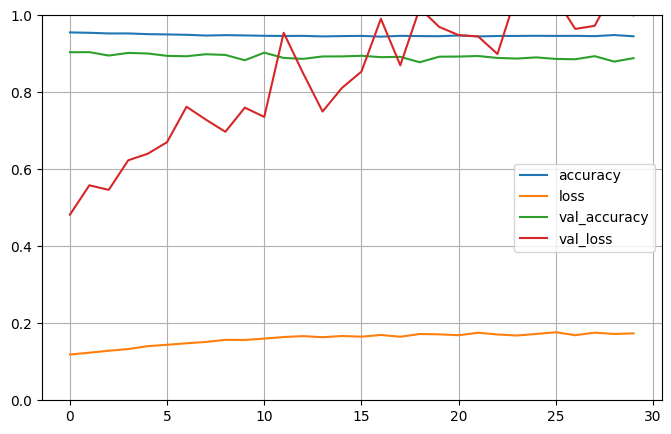

Executando avaliação final no conjunto de testes...

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8785 - loss: 1.0068
Resultado da avaliação:
- Acurácia: 0.8792
- Erro (loss): 1.0561

Gerando matriz de confusão Modelo_rmsprop 30 épocas 300 primeira camada e 100 segunda camada...

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


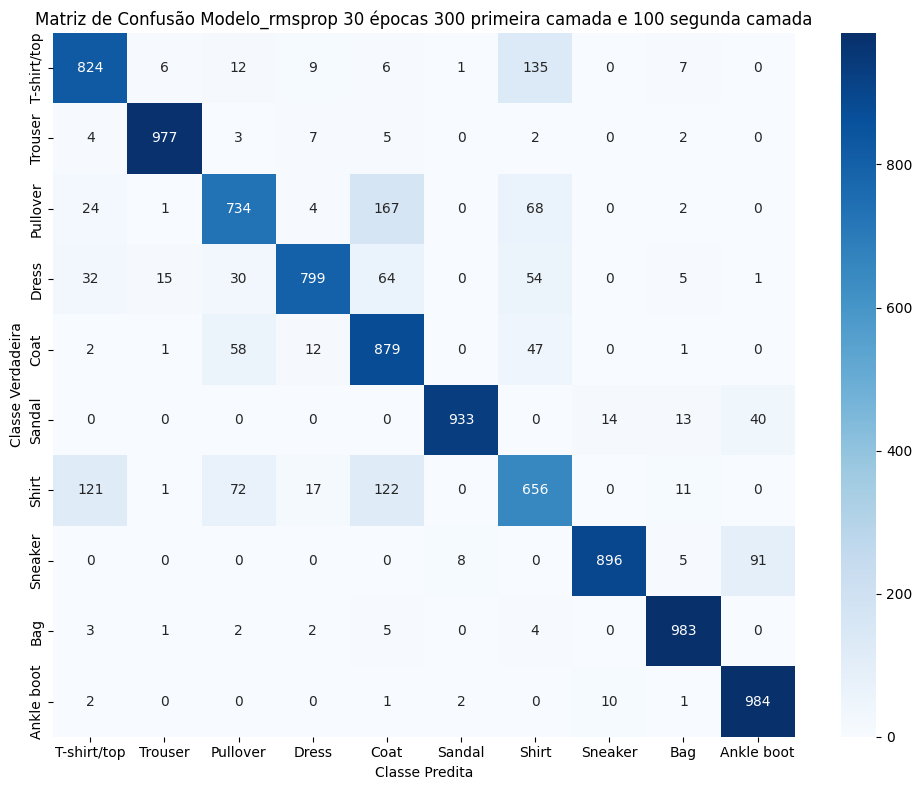

Configurando modelo para o treinamento...

- Otimizador selecionado: nadam
Iniciando treinamento por 30 épocas...
Aguarde o processo concluir.

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9433 - loss: 0.1811 - val_accuracy: 0.8830 - val_loss: 0.7125
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9389 - loss: 0.1944 - val_accuracy: 0.8890 - val_loss: 0.9039
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9458 - loss: 0.1604 - val_accuracy: 0.8906 - val_loss: 0.7241
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9449 - loss: 0.1622 - val_accuracy: 0.8924 - val_loss: 0.7288
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9477 - loss: 0.1621 - val_accuracy: 0.8848 - val_loss: 0.8137
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9508 - loss: 0.1469 - val_accuracy: 0.8892 - val_loss: 0.6800
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9

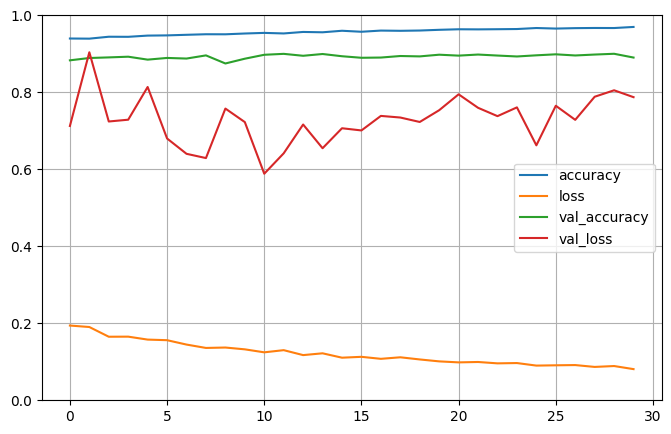

Executando avaliação final no conjunto de testes...

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8847 - loss: 0.7465
Resultado da avaliação:
- Acurácia: 0.8868
- Erro (loss): 0.7609

Gerando matriz de confusão Modelo_nadam 30 épocas 300 primeira camada e 100 segunda camada...

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


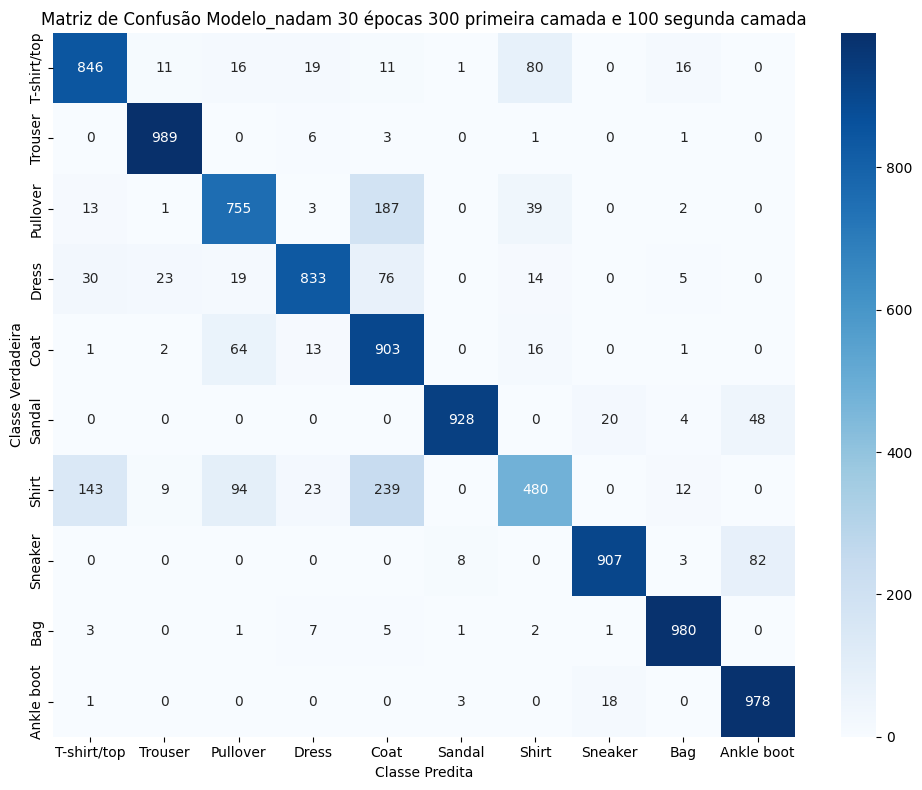

In [ ]:
modelo.criarModelo(300, 100) #300 primeira camada oculta e 100 na segunda camada oculta
modelo.compilarModelo("adam") #otimizador
modelo.treinar(30) #30 épocas
modelo.plotarCurvasDeAcuraciaEErro()
modelo.avaliarConjuntoTestesDesconhecido()
modelo.nome = "Modelo_adam 30 épocas 300 primeira camada e 100 segunda camada"
modelo.plotarMatrizDeConfusao(X_novos, y_novos)

modelo.compilarModelo("rmsprop") #otimizador
modelo.treinar(30) #30 épocas
modelo.plotarCurvasDeAcuraciaEErro()
modelo.avaliarConjuntoTestesDesconhecido()
modelo.nome = "Modelo_rmsprop 30 épocas 300 primeira camada e 100 segunda camada"
modelo.plotarMatrizDeConfusao(X_novos, y_novos)

modelo.compilarModelo("nadam") #otimizador
modelo.treinar(30) #30 épocas
modelo.plotarCurvasDeAcuraciaEErro()
modelo.avaliarConjuntoTestesDesconhecido()
modelo.nome = "Modelo_nadam 30 épocas 300 primeira camada e 100 segunda camada"
modelo.plotarMatrizDeConfusao(X_novos, y_novos)

Conclusão
Nadam: 3 categorias (Camiseta, Sandália, Bota)
Adam: 3 categorias (Calça, Casaco, Bolsa)
SGD: 3 categorias (Pullover, Vestido, Camisa)
RMSprop: 1 categoria (Tênis)
Importante destacar o SGD tem um bom desempenho em categorias que possuem classes similares.

| Classe | SGD | Adam | RMSprop | Nadam | Melhor |
|--------|-----|------|---------|-------|---------|
| **Camiseta** | 854 | 888 | 874 | **918** | Nadam |
| **Calça** | 964 | **985** | 982 | 982 | Adam |
| **Pullover** | **777** | 694 | 658 | 723 | SGD |
| **Vestido** | **907** | 791 | 855 | 758 | SGD |
| **Casaco** | 777 | **939** | 919 | 921 | Adam |
| **Sandália** | 972 | 950 | 952 | **974** | Nadam |
| **Camisa** | **733** | 568 | 578 | 509 | SGD |
| **Tênis** | 941 | 911 | **950** | 882 | RMSprop |
| **Bolsa** | 966 | **979** | 973 | 956 | Adam |
| **Bota** | 954 | 975 | 951 | **978** | Nadam |


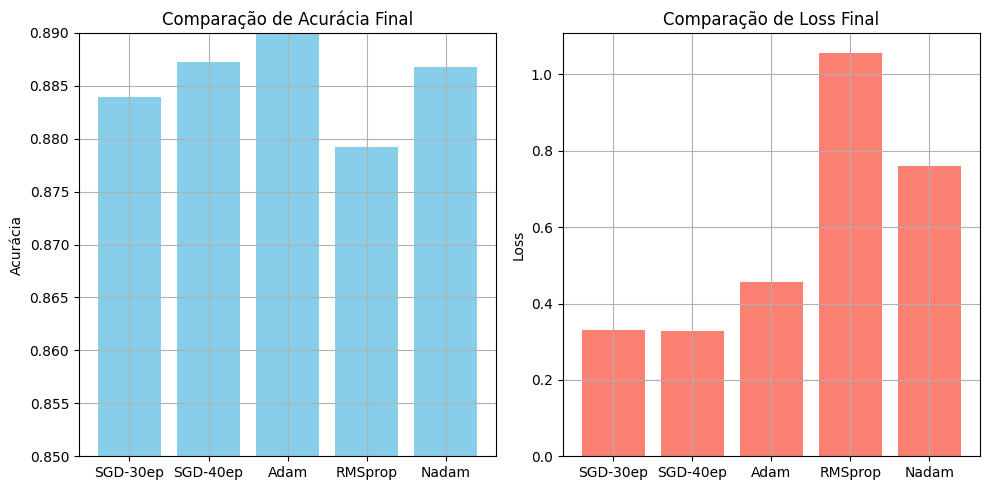

In [ ]:
import matplotlib.pyplot as plt

experimentos = ["SGD-30ep", "SGD-40ep", "Adam", "RMSprop", "Nadam"]
acuracias = [0.8839, 0.8872, 0.8916, 0.8792, 0.8868]
losses = [0.3309, 0.3287, 0.4561, 1.0561, 0.7609]

plt.figure(figsize=(10, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.bar(experimentos, acuracias, color='skyblue')
plt.ylim(0.85, 0.89)
plt.title('Comparação de Acurácia Final')
plt.ylabel('Acurácia')
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.bar(experimentos, losses, color='salmon')
plt.title('Comparação de Loss Final')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()
